In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mkt_data = pd.read_csv('synthetic_ecommerce_data.csv') #importing the file


In [3]:
mkt_data.head(5) #viewing the first few rows

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


In [4]:
mkt_data.isnull().sum() #viewing if there is a null data

Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64

In [5]:
mkt_data.columns = mkt_data.columns.str.lower() #fixing the name to lowercase
mkt_data.head(5)

,transaction_id,customer_id,product_id,transaction_date,units_sold,discount_applied,revenue,clicks,impressions,conversion_rate,category,region,ad_ctr,ad_cpc,ad_spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


1. Customer Lifetime Value (CLV) Analysis

In [6]:
# Convert transaction_date to datetime
mkt_data['transaction_date'] = pd.to_datetime(mkt_data['transaction_date'])

# Extract the year from the datetime object
mkt_data['year'] = mkt_data['transaction_date'].dt.year

# grouping by year
sum_revenue= mkt_data.groupby(['year'])['revenue'].sum()

#To get the header
#print(sum_revenue.to_string(index=True, header=True)) 

#groupbyregion 
grp_year= mkt_data.groupby(['year','region'])['revenue'].sum()
grp_year

year  region       
2023  Asia              1229401.17
      Europe            1252051.13
      North America     1241617.47
2024  Asia             17263469.96
      Europe           17146930.20
      North America    17177611.14
Name: revenue, dtype: float64

2. Sales Performance by Product

In [7]:
# Total revenue per customer
clv = mkt_data.groupby('customer_id')['revenue'].sum().reset_index()
clv.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Average revenue per transaction
avg_transaction_value = mkt_data.groupby('customer_id')['revenue'].mean().reset_index()
avg_transaction_value.rename(columns={'revenue': 'avg_transaction_value'}, inplace=True)

# Merging for CLV analysis
clv = clv.merge(avg_transaction_value, on='customer_id')
print(clv.head())

      customer_id  total_revenue  avg_transaction_value
0      Customer_1        2932.58             586.516000
1     Customer_10        2925.10             975.033333
2    Customer_100        2927.21             585.442000
3   Customer_1000        2208.97             736.323333
4  Customer_10000        2650.34             883.446667


In [8]:
# Group by product to calculate total revenue and units sold
product_performance = mkt_data.groupby('product_id').agg({
    'units_sold': 'sum',
    'revenue': 'sum',
    'discount_applied': 'mean'
}).reset_index()

# Sort by revenue
product_performance = product_performance.sort_values(by='revenue', ascending=False)
print(product_performance.head(10))

      product_id  units_sold    revenue  discount_applied
11   Product_108       15849  125682.19          0.138803
340  Product_404       13930  125115.04          0.140420
302  Product_370       15338  123196.60          0.130513
652  Product_686       13338  121787.93          0.125752
745   Product_77       13610  121302.64          0.147857
348  Product_411       16323  121283.88          0.147949
177  Product_258       15216  121225.16          0.141102
998  Product_998       15822  120448.50          0.150000
657  Product_690       14063  120414.76          0.130893
738  Product_763       13125  120157.60          0.158649


In [9]:
# Calculate ROAS (Return on Ad Spend)
mkt_data['roas'] = mkt_data['revenue'] / mkt_data['ad_spend']

# Average ROAS by region
roas_by_region = mkt_data.groupby('region')['roas'].mean().reset_index()
print(roas_by_region)

          region       roas
0           Asia  13.751605
1         Europe  13.574929
2  North America  13.656352


In [10]:
# Extract month and analyze trends
mkt_data['month'] = mkt_data['transaction_date'].dt.month

# Revenue trends by month
monthly_trends = mkt_data.groupby('month')['revenue'].sum().reset_index()
print(monthly_trends)

    month     revenue
0       1  4665609.02
1       2  4312157.04
2       3  4705422.31
3       4  4406829.73
4       5  4645304.43
5       6  4614620.94
6       7  4572138.90
7       8  4579761.33
8       9  4551504.34
9      10  4771718.89
10     11  4828945.03
11     12  4657069.11


In [11]:
# # Extract the YYMM from the datetime object
# mktg_m = mkt_data['transaction_date'].dt.strftime('%y-%m')
# # 

# # Revenue trends by month
# monthly_trends = mkt_data.groupby(mktg_m)['revenue'].sum().reset_index()
# monthly_trends.head(10)

# print(mkt_data['transaction_date'].dt.month.value_counts())
print(mkt_data[['transaction_date', 'revenue']].head())

  transaction_date  revenue
0       2024-10-06   305.54
1       2024-10-29  1102.19
2       2024-04-04   471.29
3       2024-08-25   980.26
4       2024-05-05   803.76


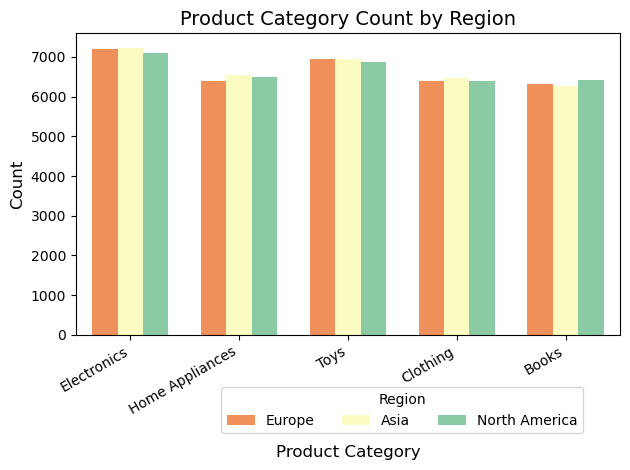

In [12]:
sns.countplot(x='category',data=mkt_data,hue='region',palette='Spectral',dodge=True, saturation=0.9,width=0.7)# Add a title and labels
# Add a title and labels
plt.title("Product Category Count by Region", fontsize=14)
plt.xlabel("Product Category", fontsize=12, labelpad=20)  # Lowered x-axis label
plt.ylabel("Count", fontsize=12)

# Adjust legend for better placement
plt.legend(title="Region", loc="upper right", fontsize=10)

# Rotate x-axis labels if needed
plt.xticks(rotation=30, ha="right", fontsize=10)

# Adjust legend placement below the plot
plt.legend(
    title="Region",
    loc="upper center",   # Position the legend at the top center of the figure
    bbox_to_anchor=(0.6, -0.15),  # Move it below the plot (x, y coordinates)
    ncol=3,               # Arrange legend items in a single row
    fontsize=10           # Set font size for better readability
)

# Display the plot
plt.tight_layout()
plt.show()


In [13]:
#year addition 
mkt_data['transaction_date	'] = pd.to_datetime(mkt_data['transaction_date'])  # convert to datetime format
mkt_data['year'] = mkt_data['transaction_date'].dt.year  # extract year component
mkt_data.head(5)



,transaction_id,customer_id,product_id,transaction_date,units_sold,discount_applied,revenue,clicks,impressions,conversion_rate,category,region,ad_ctr,ad_cpc,ad_spend,year,roas,month,transaction_date\t
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90,2024,30.862626,10,2024-10-06
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56,2024,17.340938,10,2024-10-29
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40,2024,5.271700,4,2024-04-04
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54,2024,50.166837,8,2024-08-25
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31,2024,11.941168,5,2024-05-05


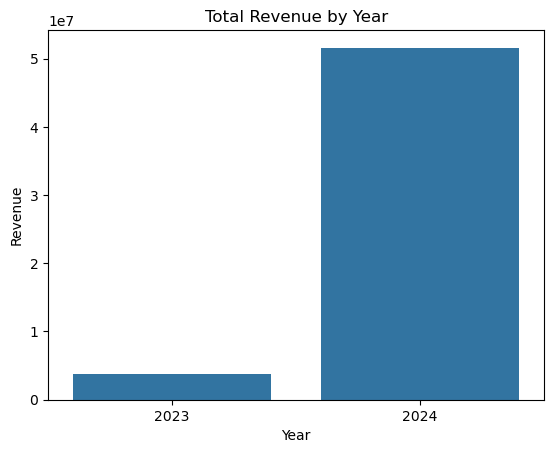

In [17]:
# Group data by year and calculate the total revenue
plot_data = mkt_data.groupby(mkt_data['transaction_date'].dt.year)['revenue'].sum().reset_index()
plot_data.columns = ['year', 'revenue']  # Rename columns for simplicity

# Create a simple bar plot
sns.barplot(x='year', y='revenue', data=plot_data)
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

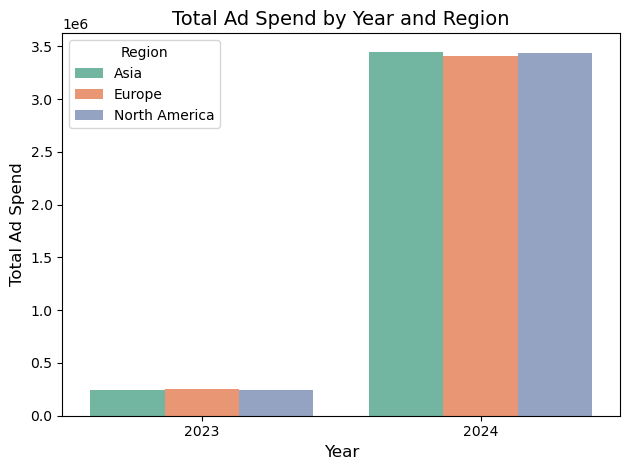

In [18]:
# Group data by year and region, and calculate the sum of ad spend
grouped_data = mkt_data.groupby([mkt_data['transaction_date'].dt.year, 'region'])['ad_spend'].sum().reset_index()
grouped_data.columns = ['year', 'region', 'total_ad_spend']  # Rename columns for clarity

# Create a segmented bar plot
sns.barplot(x='year', y='total_ad_spend', hue='region', data=grouped_data, palette='Set2', dodge=True)

# Add labels and title
plt.title("Total Ad Spend by Year and Region", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Ad Spend", fontsize=12)
plt.legend(title="Region", loc="upper left")

# Display the plot
plt.tight_layout()
plt.show()

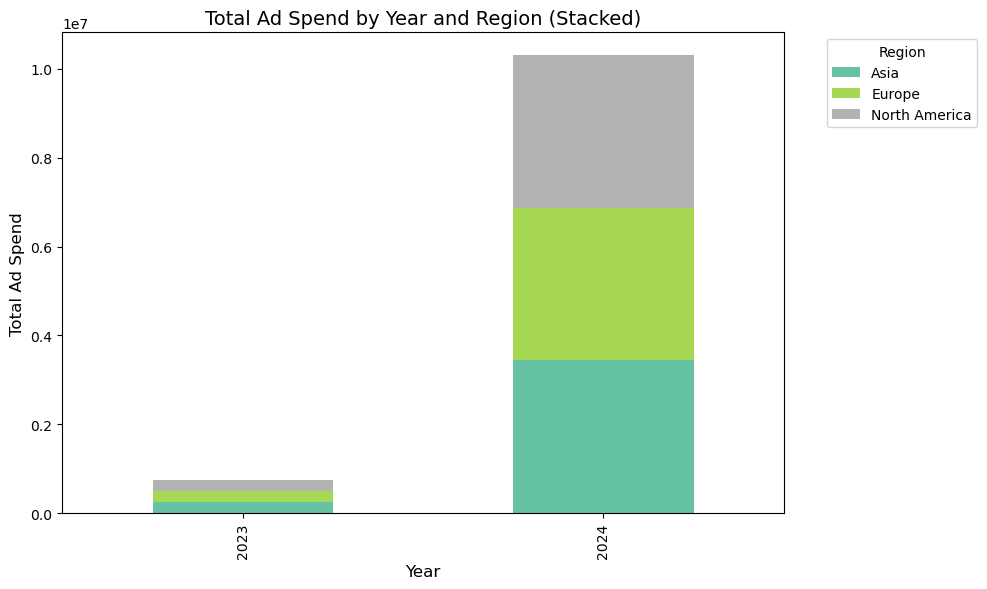

In [19]:
# Group data by year and region, and calculate the sum of ad spend
grouped_data = mkt_data.groupby([mkt_data['transaction_date'].dt.year, 'region'])['ad_spend'].sum().unstack('region')
grouped_data = grouped_data.fillna(0)  # Fill missing values with 0

# Plot the stacked bar chart
grouped_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)

# Add labels and title
plt.title("Total Ad Spend by Year and Region (Stacked)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Ad Spend", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Place legend outside
plt.tight_layout()

# Show the plot
plt.show()

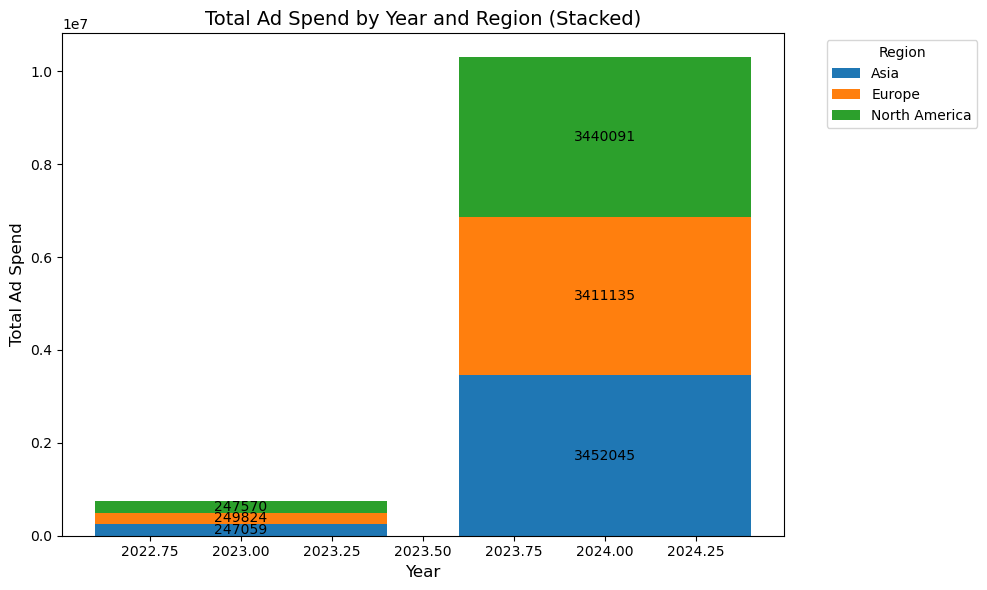

In [27]:
# Group data by year and region, and calculate the sum of ad spend
grouped_data = mkt_data.groupby([mkt_data['transaction_date'].dt.year, 'region'])['ad_spend'].sum().unstack('region')
grouped_data = grouped_data.fillna(0)  # Fill missing values with 0

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom_values = [0] * len(grouped_data)  # Initialize the bottom values for stacking

# Loop through each region to plot and annotate
for region in grouped_data.columns:
    ax.bar(grouped_data.index, grouped_data[region], label=region, bottom=bottom_values)
    # Annotate each bar segment
    for i, val in enumerate(grouped_data[region]):
        if val > 0:  # Only show annotations for non-zero values
            ax.text(grouped_data.index[i], bottom_values[i] + val / 2,  # Position text at the center of the segment
                    f'{val:.0f}', ha='center', va='center', fontsize=10)
    # Update bottom values for stacking
    bottom_values = [bottom + current for bottom, current in zip(bottom_values, grouped_data[region])]

# Add labels and title
ax.set_title("Total Ad Spend by Year and Region (Stacked)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Ad Spend", fontsize=12)
ax.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Place legend outside
plt.tight_layout()

# Show the plot
plt.show()

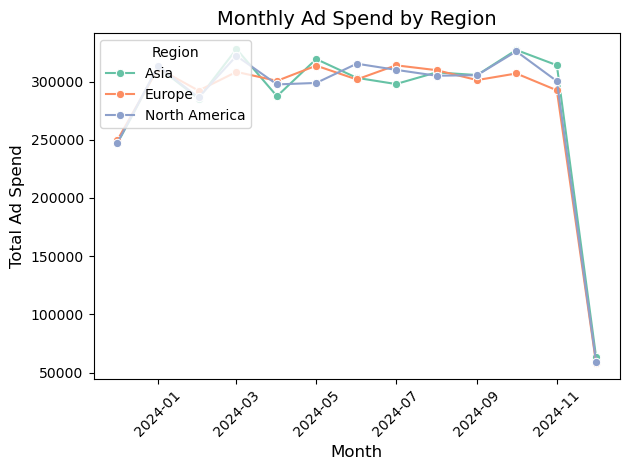

In [30]:
# Extract the month from the transaction_date column as a datetime object
mkt_data['month'] = mkt_data['transaction_date'].dt.to_period("M").dt.to_timestamp()

# Group data by month and region, and calculate the sum of ad spend
monthly_data = mkt_data.groupby(['month', 'region'])['ad_spend'].sum().reset_index()
monthly_data.columns = ['month', 'region', 'total_ad_spend']  # Rename columns for clarity

# Create the line plot
sns.lineplot(
    data=monthly_data, 
    x='month', 
    y='total_ad_spend', 
    hue='region', 
    palette='Set2', 
    marker='o'
)

# Format the x-axis to show months properly
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Add labels and title
plt.title("Monthly Ad Spend by Region", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Ad Spend", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title="Region", loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_16042/1896168964.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ctr_data, labels=campaigns, patch_artist=True)


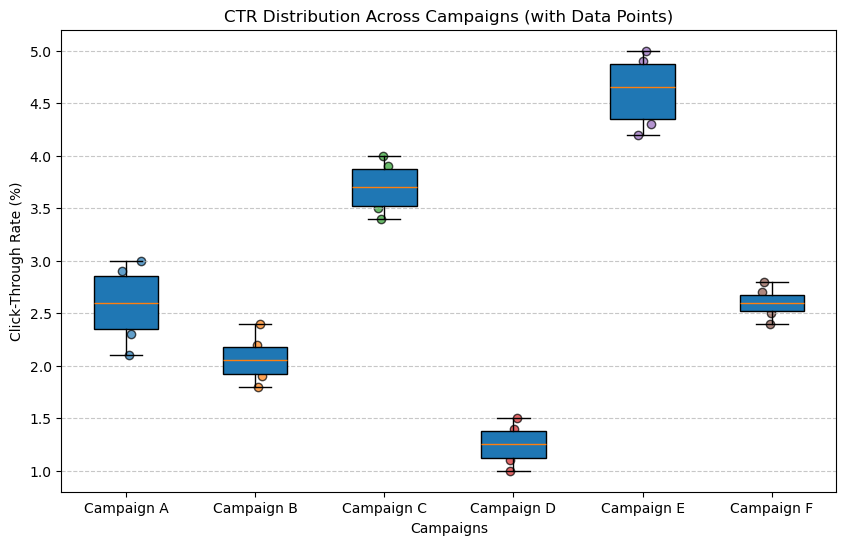

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Explicit CTR data for each campaign
campaigns = ["Campaign A", "Campaign B", "Campaign C", "Campaign D", "Campaign E", "Campaign F"]
ctr_data = [
    [2.1, 2.3, 2.5, 2.7, 3.0, 2.9],  # Campaign A
    [1.8, 2.0, 1.9, 2.2, 2.1, 2.4],  # Campaign B
    [3.5, 3.6, 3.4, 3.8, 4.0, 3.9],  # Campaign C
    [1.0, 1.2, 1.1, 1.3, 1.5, 1.4],  # Campaign D
    [4.2, 4.3, 4.5, 4.8, 5.0, 4.9],  # Campaign E
    [2.5, 2.6, 2.4, 2.8, 2.7, 2.6],  # Campaign F
]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ctr_data, labels=campaigns, patch_artist=True)

# Overlay individual CTR data points
for i, data in enumerate(ctr_data):
    x_values = np.random.normal(i + 1, 0.04, size=len(data))  # Add slight jitter
    plt.scatter(x_values, data, alpha=0.7, edgecolor='k')

# Add titles and labels
plt.title("CTR Distribution Across Campaigns (with Data Points)")
plt.ylabel("Click-Through Rate (%)")
plt.xlabel("Campaigns")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
